In this notebook, we will train the following algorithms on our cleaned data, Data.csv, and compare their performance to create a model that predicts bacterial beach water pollution:

- Logistic Regression
- Naive Bayes
- Decision Trees
- Random Forests

# 1. Loading and preparing data for training 

In [85]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score ,confusion_matrix, f1_score, classification_report

import pickle

In [86]:
data = pd.read_csv('Data.csv') #loading data

In [87]:
data.head()

,SPLocation,Beach Number,County,County Number,Region Number,Date,Year,Month,Day,DayofYear,...,Precipitation1d,Precipitation2d,Precipitation3d,Precipitation4d,Precipitation5d,Precipitation6d,Precipitation7d,Population,DaysSinceStorm,SeasonalPopulation
0,BEACH DRIVE,44,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
1,BECKRICH RD,45,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
2,BID-A-WEE BEACH,46,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
3,CARL GRAY PARK,47,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
4,DELWOOD,48,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170521 entries, 0 to 170520
Data columns (total 37 columns):
SPLocation            170521 non-null object
Beach Number          170521 non-null int64
County                170521 non-null object
County Number         170521 non-null int64
Region Number         170521 non-null int64
Date                  170521 non-null object
Year                  170521 non-null int64
Month                 170521 non-null int64
Day                   170521 non-null int64
DayofYear             170521 non-null int64
Weather               170521 non-null float64
WaterTemp             170521 non-null float64
AirTemp               170521 non-null float64
RainFall24h           170521 non-null float64
RainFall3d            170521 non-null float64
RainLastWeek          170521 non-null float64
enterococcus          170521 non-null int64
Pollution             170521 non-null int64
Precipitation         170521 non-null float64
MaxTemp               170521 non-nul

In [89]:
data.describe()

,Beach Number,County Number,Region Number,Year,Month,Day,DayofYear,Weather,WaterTemp,AirTemp,...,Precipitation1d,Precipitation2d,Precipitation3d,Precipitation4d,Precipitation5d,Precipitation6d,Precipitation7d,Population,DaysSinceStorm,SeasonalPopulation
count,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,...,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,1.705210e+05,170521.000000,1.705210e+05
mean,147.998557,18.688126,2.208813,2008.352391,6.563098,15.691756,212.584690,1.331326,75.523298,75.876831,...,0.157194,0.155051,0.158397,0.153510,0.157871,0.162634,0.150272,6.316686e+05,-0.511497,8.504269e+05
std,81.760453,9.354731,0.923143,4.552705,3.380557,8.794727,101.749606,0.539115,10.064535,11.570700,...,0.469371,0.475809,0.497689,0.474043,0.475353,0.496810,0.445077,7.042099e+05,2.259927,1.045847e+06
min,1.000000,1.000000,1.000000,2000.000000,1.000000,1.000000,31.000000,1.000000,20.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.829000e+03,-1.000000,9.829000e+03
25%,83.000000,15.000000,2.000000,2004.000000,4.000000,8.000000,126.000000,1.000000,70.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.526376e+05,-1.000000,1.636482e+05
50%,148.000000,21.000000,2.000000,2008.000000,7.000000,16.000000,216.000000,1.000000,77.000000,78.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.366584e+05,-1.000000,3.927396e+05
75%,215.000000,25.000000,3.000000,2012.000000,9.000000,23.000000,299.000000,2.000000,83.000000,84.000000,...,0.070000,0.070000,0.070000,0.060000,0.070000,0.070000,0.060000,9.175326e+05,-1.000000,1.130788e+06
max,293.000000,35.000000,4.000000,2017.000000,12.000000,31.000000,391.000000,3.000000,1010.000000,896.750000,...,12.000000,15.430000,10.640000,12.100000,12.110000,12.000000,15.430000,2.666294e+06,15.000000,5.332588e+06


In [90]:
data.columns

Index(['SPLocation', 'Beach Number', 'County', 'County Number',
       'Region Number', 'Date', 'Year', 'Month', 'Day', 'DayofYear', 'Weather',
       'WaterTemp', 'AirTemp', 'RainFall24h', 'RainFall3d', 'RainLastWeek',
       'enterococcus', 'Pollution', 'Precipitation', 'MaxTemp', 'MaxTemp1d',
       'MaxTemp2d', 'MaxTemp3d', 'MaxTemp4d', 'MaxTemp5d', 'MaxTemp6d',
       'MaxTemp7d', 'Precipitation1d', 'Precipitation2d', 'Precipitation3d',
       'Precipitation4d', 'Precipitation5d', 'Precipitation6d',
       'Precipitation7d', 'Population', 'DaysSinceStorm',
       'SeasonalPopulation'],
      dtype='object')

Since mostly clean beaches make it harder for our algorithms to learn pollution, we will remove beaches that have a pollution rate less than .03.
We will also remove beaches that have a number of tests less than 500 because those beaches are not sampled enough to support a pattern in out dataframe.

In [91]:
#Now, for each beach in our dataset, we create two lists pr_list and n_list
#pr_list will record the pollution rate of each beach
#n_list will record the number of tests on each beach
beach_list = data.SPLocation.unique().tolist() #the list of beaches as beach_list
pr_list = [] #creating pr_list empty
n_list = [] #creating n_list empty
for b in beach_list: #for each beach in the beach_list
    pr = data[data['SPLocation'] == b].Pollution.mean() #pr is the pollution rate of the beach
    n = len(data[data['SPLocation'] == b]) #n is the number of test on the beach
    pr_list.append(pr) #add p to the pr_list
    n_list.append(n) #add n to the n_list

In [92]:
#Looks like the lists have same length, so we did nothing wrong
print(len(beach_list), len(pr_list),len(n_list))

291 291 291


In [93]:
def pr(b): #a function that assigns each beach b with its pollution rate
    return pr_list[beach_list.index(b)]
def n(b): #a function that assigns each beach b with its number of tests
    return n_list[beach_list.index(b)]

In [94]:
data['PR'] = data['SPLocation'].apply(pr) #we add a column named PR that records the number of pollution events
data['NumTests'] = data['SPLocation'].apply(n) #we add a column named NumTests that records the number of tests

In [95]:
pr_treshold = 0.03 #set a treshold for pollution rate as mentioned above
n_treshold = 500 #set a treshold for number of tests

In [96]:
#Now we will slice our dataframe to work with the beaches that have
#1) a pollution rate greater than the pr_treshold = .03, and
#2) a number of tests greater than or equal the n_treshold = 500
df = data[(data.PR >= pr_treshold) & (data.NumTests >= n_treshold)].drop(['PR', 'NumTests'],axis=1)

In [97]:
df.SPLocation.value_counts()

SOUTH BEACH PARK                     1473
NORTH SHORE OCEAN TERRACE             878
VENICE BEACH                          866
SIESTA KEY BEACH                      864
COLLINS PARK - 21ST ST                857
53RD ST - MIAMI BEACH                 853
BEN T. DAVIS NORTH                    841
LIDO CASINO BEACH                     840
TURTLE BEACH                          839
HAULOVER BEACH                        836
DOG BEACH                             834
NORTH JETTY BEACH                     834
NOKOMIS BEACH                         832
SURFSIDE BEACH - 93RD ST              830
KEY BISCAYNE BEACH                    830
SANDERS BEACH                         829
CAPE CORAL YACHT CLUB                 828
BAHIA BEACH                           827
GOLDEN BEACH                          827
PICNIC ISLAND NORTH                   825
NORTH LIDO BEACH                      821
DAVIS ISLAND BEACH                    821
LIGHTHOUSE BEACH                      819
BOWDITCH PARK                     

In [98]:
#After slicing we are left with 80562 samples in our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94063 entries, 0 to 170520
Data columns (total 37 columns):
SPLocation            94063 non-null object
Beach Number          94063 non-null int64
County                94063 non-null object
County Number         94063 non-null int64
Region Number         94063 non-null int64
Date                  94063 non-null object
Year                  94063 non-null int64
Month                 94063 non-null int64
Day                   94063 non-null int64
DayofYear             94063 non-null int64
Weather               94063 non-null float64
WaterTemp             94063 non-null float64
AirTemp               94063 non-null float64
RainFall24h           94063 non-null float64
RainFall3d            94063 non-null float64
RainLastWeek          94063 non-null float64
enterococcus          94063 non-null int64
Pollution             94063 non-null int64
Precipitation         94063 non-null float64
MaxTemp               94063 non-null float64
MaxTemp1d  

In [99]:
#The total number of beaches in our dataframe is
df['SPLocation'].nunique()

137

In [100]:
#Moreover, the ratio of pollution events in our dataframe is
df.Pollution.sum()/len(df)

0.08220022750709631

Notice that the last line show the imbalance in the data. Only 8.2% of our data labelled with Pollution =1.

In [101]:
#Now we choose a subset of columns in the dataframe df that will be our features or our target (Pollution)
df = df[['Beach Number', 'WaterTemp', 'AirTemp', 'RainFall24h', 'RainFall3d', 'RainLastWeek', 
         'DayofYear', 'Pollution', 'MaxTemp1d', 'MaxTemp4d', 'MaxTemp7d', 'SeasonalPopulation']]

In [102]:
#creating the correlation matrix for the columns in the dataset
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Beach Number,WaterTemp,AirTemp,RainFall24h,RainFall3d,RainLastWeek,DayofYear,Pollution,MaxTemp1d,MaxTemp4d,MaxTemp7d,SeasonalPopulation
Beach Number,1,0.0733923,0.0751673,0.00439147,-0.00212883,-0.00400563,-0.0016668,-0.0805212,0.140647,0.151282,0.148321,0.405087
WaterTemp,0.0733923,1,0.865425,0.0749531,0.0264403,0.111523,0.279005,0.0355837,0.717308,0.691952,0.68574,0.224136
AirTemp,0.0751673,0.865425,1,0.0573833,0.0203298,0.0893438,0.216211,0.0293013,0.700769,0.636663,0.634518,0.235501
RainFall24h,0.00439147,0.0749531,0.0573833,1,0.112067,0.220707,0.0179307,0.0867147,0.0686453,0.0835311,0.0780913,0.0349859
RainFall3d,-0.00212883,0.0264403,0.0203298,0.112067,1,0.126076,0.00635756,0.0249806,0.0126526,0.0263478,0.0256818,0.0172246
RainLastWeek,-0.00400563,0.111523,0.0893438,0.220707,0.126076,1,0.0602967,0.0710189,0.0671166,0.0967404,0.119269,0.0868611
DayofYear,-0.0016668,0.279005,0.216211,0.0179307,0.00635756,0.0602967,1,0.00550186,0.22437,0.283988,0.306307,0.0603299
Pollution,-0.0805212,0.0355837,0.0293013,0.0867147,0.0249806,0.0710189,0.00550186,1,0.026789,0.0243137,0.0215319,-0.0216894
MaxTemp1d,0.140647,0.717308,0.700769,0.0686453,0.0126526,0.0671166,0.22437,0.026789,1,0.763379,0.748653,0.202743
MaxTemp4d,0.151282,0.691952,0.636663,0.0835311,0.0263478,0.0967404,0.283988,0.0243137,0.763379,1,0.771097,0.2046


# 2. Logistic Regression

In this part, we train the logistic regression (LR) algorithm on our data and evaluate its performance. Our dataframe contains a categorical feature, namely Beach Number. We first turn Beach Number in to one-hot form, using pandas' get_dummies.

In [103]:
location = pd.get_dummies(df['Beach Number'], drop_first = True)
#created numerical features for beaches
df_onehot = pd.concat([df,location], axis = 1).drop(['Beach Number'], axis = 1)
#removing Beach Number from our data while adding the one-hot encoding

Now we create X (features) and y (target) to train and test our algorithm.

In [104]:
X_onehot = df_onehot.drop(['Pollution'],axis=1)
y_onehot = df_onehot['Pollution']
#splitting X and y into train-test with 80-20 ratio
X_onehot_train,X_onehot_test,y_onehot_train,y_onehot_test = train_test_split(X_onehot.values,y_onehot.values,test_size = 0.2,stratify = y_onehot)

Next we call the logistic regression as logmodel and train it on the training data. We will set class_weight = 'balanced' to overcome the imbalance in the data (only 8% pollution).

In [105]:
logmodel = LogisticRegression(penalty = 'l2', C = 1, class_weight = 'balanced', solver = 'liblinear')
#with 'l2' regularization and class_weight
logmodel.fit(X_onehot_train,y_onehot_train) #training our model on the train data

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Finally, we evaluate the performance of our model on the test set.

In [106]:
pred = logmodel.predict(X_onehot_test) #yielding predictions of the trained model on the test data 
print(classification_report(y_onehot_test,pred)) #printing recall, precision, etc. values

              precision    recall  f1-score   support

           0       0.94      0.53      0.68     17267
           1       0.10      0.60      0.18      1546

    accuracy                           0.54     18813
   macro avg       0.52      0.57      0.43     18813
weighted avg       0.87      0.54      0.64     18813



Before completing this part we will train the LR on our data one again, this time with l1 regularization.

In [107]:
logmodel = LogisticRegression(penalty = 'l1', C = 1, class_weight = 'balanced', solver = 'liblinear')
logmodel.fit(X_onehot_train,y_onehot_train) #training our model on the train data
pred = logmodel.predict(X_onehot_test) #yielding predictions of the trained model on the test data 
print(classification_report(y_onehot_test,pred)) #printing recall, precision, etc. values

              precision    recall  f1-score   support

           0       0.95      0.70      0.81     17267
           1       0.15      0.60      0.24      1546

    accuracy                           0.69     18813
   macro avg       0.55      0.65      0.52     18813
weighted avg       0.89      0.69      0.76     18813



We see that LR with l1 regularization performs better than LR with l2 regularization. Next we train Naive Bayes on our data.

# 3. Naive Bayes Classifier

In this part we train Naive Bayes classifier on our data. Since Naive Bayes does not work with categorical features, we will train our data on the one-hot encoding of the features, which are defined above

In [108]:
NBmodel = ComplementNB()

NBmodel.fit(X_onehot_train,y_onehot_train)
pred = NBmodel.predict(X_onehot_test)
print(classification_report(y_onehot_test,pred)) #printing recall, precision, etc. values

              precision    recall  f1-score   support

           0       0.93      0.34      0.50     17267
           1       0.09      0.72      0.16      1546

    accuracy                           0.37     18813
   macro avg       0.51      0.53      0.33     18813
weighted avg       0.86      0.37      0.47     18813



Naive Bayes classifier performed better than LR on the recall. However, it has a low precision and f1-score on pollution.

# 4. Decision Trees

In this part we train the Decision tree classifier on our data. Decision Trees do not require one-hot coding. Therefore, we will not apply get_dummies to Beach Number feature.

In [121]:
X = df.drop(['Pollution'],axis=1)
y = df['Pollution']

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,stratify = y,random_state =2)

In [122]:
#To overcome the imbalance problem, use SMOTE from imblearn library to upsample the minority class in a smart way

print("Before OverSampling, counts of label '1': {}".format(sum(ytrain == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(ytrain == 0))) 

# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
Xtup, ytup = sm.fit_sample(Xtrain, ytrain.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(Xtup.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(ytup.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(ytup == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(ytup == 0)))

Before OverSampling, counts of label '1': 6186
Before OverSampling, counts of label '0': 69064 

After OverSampling, the shape of train_X: (138128, 11)
After OverSampling, the shape of train_y: (138128,) 

After OverSampling, counts of label '1': 69064
After OverSampling, counts of label '0': 69064


In [145]:
tree = DecisionTreeClassifier()
tree.fit(Xtrain,ytrain)
pred = tree.predict(Xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     17267
           1       0.29      0.32      0.30      1546

    accuracy                           0.88     18813
   macro avg       0.61      0.62      0.62     18813
weighted avg       0.89      0.88      0.88     18813



In [124]:
tree = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=24,
    min_samples_leaf=4,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,)
tree.fit(Xtup,ytup)
pred = tree.predict(Xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     17267
           1       0.25      0.41      0.31      1546

    accuracy                           0.85     18813
   macro avg       0.60      0.65      0.61     18813
weighted avg       0.89      0.85      0.87     18813



# 5. Random Forest Classifier

In this part we will train Random Forests on our data and increase its performance with hyperparameter tuning. Since we will be evaluating the scores of multiple models, we start by creating an evaluation function, which reports...

In [132]:
def evaluation(ytest,Xtest,cls):

    scores = init_scores()
    ypred = cls.predict(Xtest)
    C = confusion_matrix(ytest,ypred)
    TN = C[0][0]
    FN = C[1][0]
    TP = C[1][1]
    FP = C[0][1]

    print('f1_score: {:0.3f}'.format(f1_score(ytest,ypred)))
    scores['f1_score'].append(f1_score(ytest,ypred))
    print('precision: {:0.3f}'.format(TP/(TP+FP)))
    scores['precision'].append(TP/(TP+FP))
    print('recall: {:0.3f}'.format(TP/(TP+FN)))
    scores['recall'].append(TP/(TP+FN))
    print('accuracy: {:0.3f}'.format(accuracy_score(ytest,ypred)))
    scores['accuracy'].append(accuracy_score(ytest,ypred))
    return scores

In [28]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None , 
                                  min_samples_split= 2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:1}, 
                                  ccp_alpha=0.0, max_samples=None)
model.fit(Xtup, ytup)
pred = model.predict(Xtest) #yielding predictions of the trained model on the test data 
print(classification_report(ytest,pred)) #printing recall, precision, etc. values

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     17267
           1       0.37      0.36      0.37      1546

    accuracy                           0.90     18813
   macro avg       0.66      0.65      0.66     18813
weighted avg       0.90      0.90      0.90     18813



In [29]:
for p in [5, 10, 12, 14, 20, 30]:
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= p, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:1}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('---test performance for min_samples_split = {}----'.format(p) )
    model.fit(Xtup, ytup)
    evaluation(ytest,Xtest,model)

---test performance for min_samples_split = 5----
f1_score: 0.360
precision: 0.377
recall: 0.345
accuracy: 0.899
---test performance for min_samples_split = 10----
f1_score: 0.361
precision: 0.366
recall: 0.356
accuracy: 0.896
---test performance for min_samples_split = 12----
f1_score: 0.358
precision: 0.361
recall: 0.355
accuracy: 0.895
---test performance for min_samples_split = 14----
f1_score: 0.359
precision: 0.357
recall: 0.361
accuracy: 0.894
---test performance for min_samples_split = 20----
f1_score: 0.361
precision: 0.350
recall: 0.373
accuracy: 0.892
---test performance for min_samples_split = 30----
f1_score: 0.350
precision: 0.331
recall: 0.371
accuracy: 0.887


In [30]:
for p in [50]:
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= p, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:1}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('---test performance for min_samples_split = {}----'.format(p) )
    model.fit(Xtup, ytup)
    evaluation(ytest,Xtest,model)

---test performance for min_samples_split = 50----
f1_score: 0.347
precision: 0.314
recall: 0.387
accuracy: 0.880


In [31]:
for p in [5, 10, 12, 14, 20, 30, 50]: #with class_weight = {0:1,1:200}
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= p, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:200}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('---test performance for min_samples_split = {}----'.format(p) )
    model.fit(Xtup, ytup)
    evaluation(ytest,Xtest,model)

---test performance for min_samples_split = 5----
f1_score: 0.361
precision: 0.322
recall: 0.410
accuracy: 0.881
---test performance for min_samples_split = 10----
f1_score: 0.353
precision: 0.270
recall: 0.512
accuracy: 0.846
---test performance for min_samples_split = 12----
f1_score: 0.344
precision: 0.253
recall: 0.538
accuracy: 0.831
---test performance for min_samples_split = 14----
f1_score: 0.332
precision: 0.237
recall: 0.554
accuracy: 0.816
---test performance for min_samples_split = 20----
f1_score: 0.310
precision: 0.206
recall: 0.622
accuracy: 0.772
---test performance for min_samples_split = 30----
f1_score: 0.269
precision: 0.167
recall: 0.693
accuracy: 0.690
---test performance for min_samples_split = 50----
f1_score: 0.223
precision: 0.130
recall: 0.776
accuracy: 0.556


In [32]:
for p in [1,2,3,4,5,8]: #with class_weight={0:1,1:300} and min_samples_split= 14
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 14, min_samples_leaf=p, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:300}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('---test performance for min_samples_leaf = {}----'.format(p) )
    model.fit(Xtup, ytup)
    evaluation(ytest,Xtest,model)

---test performance for min_samples_leaf = 1----
f1_score: 0.332
precision: 0.238
recall: 0.550
accuracy: 0.818
---test performance for min_samples_leaf = 2----
f1_score: 0.319
precision: 0.215
recall: 0.618
accuracy: 0.783
---test performance for min_samples_leaf = 3----
f1_score: 0.307
precision: 0.200
recall: 0.662
accuracy: 0.755
---test performance for min_samples_leaf = 4----
f1_score: 0.289
precision: 0.183
recall: 0.688
accuracy: 0.722
---test performance for min_samples_leaf = 5----
f1_score: 0.279
precision: 0.173
recall: 0.721
accuracy: 0.694
---test performance for min_samples_leaf = 8----
f1_score: 0.241
precision: 0.142
recall: 0.798
accuracy: 0.587


In [33]:
for p in [11,13,14,15,16,24]: #with min_samples_leaf=2 and class_weight={0:1,1:250}
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= p, min_samples_leaf=2, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:250}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('---test performance for min_samples_split = {}----'.format(p) )
    model.fit(Xtup, ytup)
    evaluation(ytest,Xtest,model)

---test performance for min_samples_split = 11----
f1_score: 0.334
precision: 0.234
recall: 0.583
accuracy: 0.809
---test performance for min_samples_split = 13----
f1_score: 0.324
precision: 0.221
recall: 0.602
accuracy: 0.793
---test performance for min_samples_split = 14----
f1_score: 0.320
precision: 0.217
recall: 0.614
accuracy: 0.786
---test performance for min_samples_split = 15----
f1_score: 0.312
precision: 0.208
recall: 0.618
accuracy: 0.776
---test performance for min_samples_split = 16----
f1_score: 0.310
precision: 0.205
recall: 0.635
accuracy: 0.768
---test performance for min_samples_split = 24----
f1_score: 0.279
precision: 0.174
recall: 0.706
accuracy: 0.700


In [34]:
for p in [20,21,22,23, 24,25]: #with min_samples_leaf=4 and class_weight={0:1,1:250}
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= p, min_samples_leaf=4, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:250}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('---test performance for min_samples_split = {}----'.format(p) )
    model.fit(Xtrain, ytrain)
    evaluation(ytest,Xtest,model)

---test performance for min_samples_split = 20----
f1_score: 0.362
precision: 0.278
recall: 0.522
accuracy: 0.849
---test performance for min_samples_split = 21----
f1_score: 0.359
precision: 0.272
recall: 0.528
accuracy: 0.845
---test performance for min_samples_split = 22----
f1_score: 0.363
precision: 0.273
recall: 0.543
accuracy: 0.844
---test performance for min_samples_split = 23----
f1_score: 0.360
precision: 0.269
recall: 0.545
accuracy: 0.841
---test performance for min_samples_split = 24----
f1_score: 0.362
precision: 0.268
recall: 0.555
accuracy: 0.839
---test performance for min_samples_split = 25----
f1_score: 0.355
precision: 0.261
recall: 0.554
accuracy: 0.835


In [35]:
for p in [3,4,5,6]: #with min_samples_split= 22 and class_weight={0:1,1:250}
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 22, min_samples_leaf=p, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:250}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('---test performance for min_samples_leaf = {}----'.format(p) )
    model.fit(Xtrain, ytrain)
    evaluation(ytest,Xtest,model)

---test performance for min_samples_leaf = 3----
f1_score: 0.363
precision: 0.280
recall: 0.516
accuracy: 0.851
---test performance for min_samples_leaf = 4----
f1_score: 0.363
precision: 0.274
recall: 0.540
accuracy: 0.844
---test performance for min_samples_leaf = 5----
f1_score: 0.353
precision: 0.260
recall: 0.549
accuracy: 0.835
---test performance for min_samples_leaf = 6----
f1_score: 0.356
precision: 0.257
recall: 0.576
accuracy: 0.829


In [36]:
for p in [200,250,300,500,750]: #min_samples_split= 22 and min_samples_leaf=4
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 22, min_samples_leaf=4, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:p}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('---test performance for class_weight = 1 to {}----'.format(p) )
    model.fit(Xtrain, ytrain)
    evaluation(ytest,Xtest,model)

---test performance for class_weight = 1 to 200----
f1_score: 0.366
precision: 0.277
recall: 0.540
accuracy: 0.846
---test performance for class_weight = 1 to 250----
f1_score: 0.360
precision: 0.270
recall: 0.539
accuracy: 0.842
---test performance for class_weight = 1 to 300----
f1_score: 0.358
precision: 0.267
recall: 0.541
accuracy: 0.840
---test performance for class_weight = 1 to 500----
f1_score: 0.360
precision: 0.269
recall: 0.542
accuracy: 0.841
---test performance for class_weight = 1 to 750----
f1_score: 0.360
precision: 0.270
recall: 0.540
accuracy: 0.842


In [37]:
for p in [200,250,300,500,750]: #min_samples_split= 24 and min_samples_leaf=4
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 24, min_samples_leaf=4, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:p}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('---test performance for class_weight = 1 to {}----'.format(p) )
    model.fit(Xtrain, ytrain)
    evaluation(ytest,Xtest,model)

---test performance for class_weight = 1 to 200----
f1_score: 0.360
precision: 0.267
recall: 0.552
accuracy: 0.839
---test performance for class_weight = 1 to 250----
f1_score: 0.358
precision: 0.265
recall: 0.553
accuracy: 0.837
---test performance for class_weight = 1 to 300----
f1_score: 0.357
precision: 0.264
recall: 0.550
accuracy: 0.837
---test performance for class_weight = 1 to 500----
f1_score: 0.354
precision: 0.261
recall: 0.552
accuracy: 0.835
---test performance for class_weight = 1 to 750----
f1_score: 0.354
precision: 0.259
recall: 0.559
accuracy: 0.832


In [38]:
for p in [100,150,200,1000]: #min_samples_split= 24 and min_samples_leaf=4
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 24, min_samples_leaf=4, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:p}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('---test performance for class_weight = 1 to {}----'.format(p) )
    model.fit(Xtrain, ytrain)
    evaluation(ytest,Xtest,model)

---test performance for class_weight = 1 to 100----
f1_score: 0.364
precision: 0.275
recall: 0.538
accuracy: 0.845
---test performance for class_weight = 1 to 150----
f1_score: 0.360
precision: 0.267
recall: 0.552
accuracy: 0.839
---test performance for class_weight = 1 to 200----
f1_score: 0.360
precision: 0.268
recall: 0.548
accuracy: 0.840
---test performance for class_weight = 1 to 1000----
f1_score: 0.352
precision: 0.258
recall: 0.553
accuracy: 0.833


In [133]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 21, min_samples_leaf=5, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:250}, 
                                  ccp_alpha=0.0, max_samples=None)
print('---test performance---' )
model.fit(Xtrain, ytrain)
evaluation(ytest,Xtest,model)

---test performance---
f1_score: 0.379
precision: 0.284
recall: 0.571
accuracy: 0.846


{'f1_score': [0.3787846252952545],
 'precision': [0.28351012536162007],
 'recall': [0.5705045278137129],
 'accuracy': [0.8462233561898687]}

In [134]:
pred = model.predict(Xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     17267
           1       0.28      0.57      0.38      1546

    accuracy                           0.85     18813
   macro avg       0.62      0.72      0.65     18813
weighted avg       0.90      0.85      0.87     18813



In [73]:
afilename = 'the_model_.sav'
pickle.dump(model, open(filename, 'wb'))

In [95]:
m = pickle.load(open('the_model.sav', 'rb'))
p = m.predict(Xtest)
print(classification_report(ytest, p))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     17267
           1       0.28      0.58      0.38      1546

    accuracy                           0.84     18813
   macro avg       0.62      0.72      0.64     18813
weighted avg       0.90      0.84      0.87     18813



In [96]:
#This is going to be our model.

In [97]:
print(confusion_matrix(ytest, p))

[[14931  2336]
 [  649   897]]


# 6. Baseline: Dummyclassifier

In [154]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = 'uniform')
dummy.fit(Xtrain,ytrain)

pred = dummy.predict(Xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.91      0.50      0.65     17267
           1       0.08      0.47      0.14      1546

    accuracy                           0.50     18813
   macro avg       0.50      0.49      0.39     18813
weighted avg       0.85      0.50      0.61     18813



# 7. Feature Importance

Beach Number 0.11624369700313328
WaterTemp 0.08655054537374596
AirTemp 0.10857333264645794
RainFall24h 0.0345477635317026
RainFall3d 0.05649769974310887
RainLastWeek 0.0798649948389313
DayofYear 0.12100043375164911
MaxTemp1d 0.08976242030587223
MaxTemp4d 0.08809222580723153
MaxTemp7d 0.08929071904665183
SeasonalPopulation 0.12957616795151541


Text(0, 0.5, 'Feature\n')

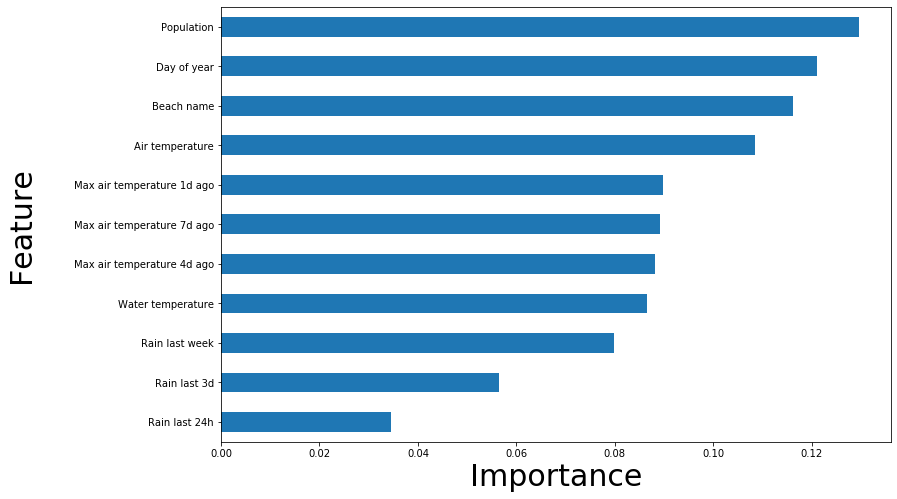

In [89]:
importances = m.feature_importances_
lst = ['Beach name','Water temperature','Air temperature','Rain last 24h','Rain last 3d','Rain last week', 'Day of year',
      'Max air temperature 1d ago', 'Max air temperature 4d ago','Max air temperature 7d ago',
      'Population']

for f in range(X.shape[1]):
    print( X.columns[f],importances[f] )
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.rcParams['figure.figsize']=(12,8)

feat_importances = pd.Series(m.feature_importances_, index = lst)
feat_importances.nsmallest(20).plot(kind='barh')
plt.xlabel('Importance', size = 30)
plt.ylabel('Feature\n', size = 30)

# 8. Comparing models' performances

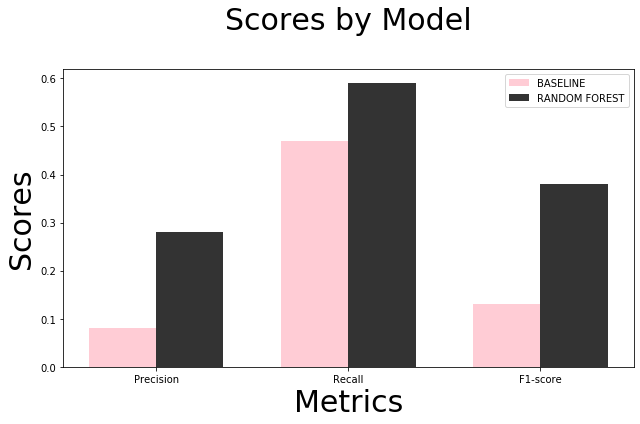

In [150]:
models = ['BASELINE', 'RANDOM FORESTS']

plt.rcParams['figure.figsize']=(9,6)


n_groups = 3
baseline = (0.08, 0.47, 0.13)
LR = (0.28, 0.59, 0.38)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, baseline, bar_width,
alpha=opacity,
color='pink',
label='BASELINE')

rects2 = plt.bar(index + bar_width, LR, bar_width,
alpha=opacity,
color='bLACK',
label='RANDOM FOREST')

plt.xlabel('Metrics',size = 30)
plt.ylabel('Scores',size=30)
plt.title('Scores by Model\n ',size =30)
plt.xticks(index + 0.5*bar_width, ('Precision', 'Recall', 'F1-score'))
plt.legend()

plt.tight_layout()
plt.show()

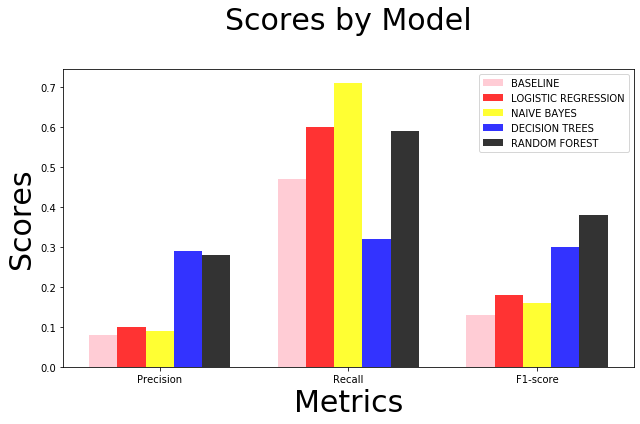

In [149]:
precision =  [0.08, .10, .09, 0.28]

recall = [0.47,.6, .71, .59]

f1_score = [.13,.18,.16, .38]


models = ['BASELINE', 'LOGISTIC REGRESSION', 'NAIVE BAYES', 'RANDOM FORESTS']

plt.rcParams['figure.figsize']=(9,6)


n_groups = 3
baseline = (0.08, 0.47, 0.13)
LR = (.10,.6,.18) 
NB = (.09,.71,.16)
DT = (.29,.32,.3)
RF = (0.28, 0.59, 0.38)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index+ bar_width, baseline, bar_width,
alpha=opacity,
color='pink',
label='BASELINE')

rects2 = plt.bar(index+ 2*bar_width, LR, bar_width,
alpha=opacity,
color='red',
label='LOGISTIC REGRESSION')

rects3 = plt.bar(index+ 3*bar_width, NB, bar_width,
alpha=opacity,
color='yellow',
label='NAIVE BAYES')

rects4 = plt.bar(index + 4*bar_width, DT, bar_width,
alpha=opacity,
color='b',
label='DECISION TREES')

rects5 = plt.bar(index + 5*bar_width, RF, bar_width,
alpha=opacity,
color='black',
label='RANDOM FOREST')

plt.xlabel('Metrics',size = 30)
plt.ylabel('Scores',size=30)
plt.title('Scores by Model\n ',size =30)
plt.xticks(index + 3 *bar_width, ('Precision', 'Recall', 'F1-score'))
plt.legend()

plt.tight_layout()
plt.show()